In [19]:
%matplotlib inline
import numpy as np, pyross
from matplotlib import pyplot as plt
np.set_printoptions(precision=5)
import pandas as pd

In [20]:
C1, C2, C3, C4 = pyross.contactMatrix.UK('fumanelliEtAl')
C1[89, 75:90]

array([0.39119, 0.35427, 0.34542, 0.33586, 0.32707, 0.28696, 0.28114,
       0.25382, 0.24962, 0.23011, 0.20501, 0.19506, 0.17323, 0.14054,
       0.09858])

In [21]:
M=16

CH = np.zeros((M, M))
CW = np.zeros((M, M))
CS = np.zeros((M, M))
CO = np.zeros((M, M))

jM = 5

for i in range(M-1):
    for j in range(M-1):
        i1, j1 = i*jM, j*jM

        CH[i,j] = np.sum( C1[i1:i1+jM, j1:j1+jM] )
        CW[i,j] = np.sum( C2[i1:i1+jM, j1:j1+jM] )
        CS[i,j] = np.sum( C3[i1:i1+jM, j1:j1+jM] )
        CO[i,j] = np.sum( C4[i1:i1+jM, j1:j1+jM] )

"""
In the above we have summed all iteraction till age 74 in 15x15 matrix
We will now put the remaining in last elements
"""

'\nIn the above we have summed all iteraction till age 74 in 15x15 matrix\nWe will now put the remaining in last elements\n'

In [22]:
# summing last 15 rows
s1 = np.sum(C1[75:90, :], axis=0)/3  
s2 = np.sum(C2[75:90, :], axis=0)/3
s3 = np.sum(C3[75:90, :], axis=0)/3
s4 = np.sum(C4[75:90, :], axis=0)/3

for i in range(M):
    CH[15, i] = np.sum(s1[i*5:(i+1)*5])
    CW[15, i] = np.sum(s2[i*5:(i+1)*5])
    CS[15, i] = np.sum(s3[i*5:(i+1)*5])
    CO[15, i] = np.sum(s4[i*5:(i+1)*5])

In [23]:
# summing last 15 rows
s1 = np.sum(C1[:, 75:90], axis=1)/3  
s2 = np.sum(C2[:, 75:90], axis=1)/3
s3 = np.sum(C3[:, 75:90], axis=1)/3 
s4 = np.sum(C4[:, 75:90], axis=1)/3 

for i in range(M):
    CH[i, 15] = np.sum(s1[i*5:(i+1)*5])
    CW[i, 15] = np.sum(s2[i*5:(i+1)*5])
    CS[i, 15] = np.sum(s3[i*5:(i+1)*5])
    CO[i, 15] = np.sum(s4[i*5:(i+1)*5])
    
# divide by 25 for normalisation
nFac = 25
CH, CW, CS, CO = CH/nFac, CW/nFac, CS/nFac, CO/nFac

In [24]:
CH0, CW0, CS0, CO0 = pyross.contactMatrix.UK()

C = CO0+CS0+CH0+CW0    
C2 = CO+CS+CH+CW

tot (as log)


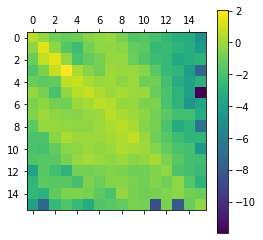

H (not log)


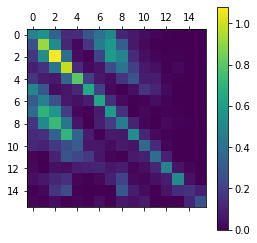

W


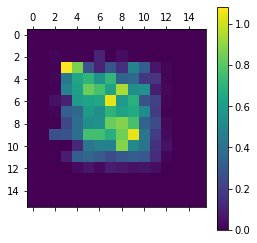

S


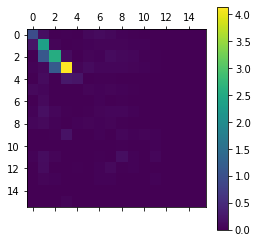

O


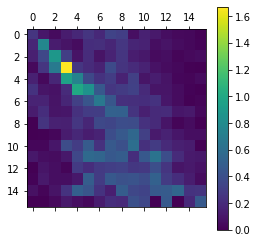

In [25]:
print('tot (as log)')
plt.matshow(np.log(C))
plt.colorbar()
plt.show()
plt.close()

strs = ['H (not log)','W','S','O']
for [ii,CC] in enumerate( [CH0,CW0,CS0,CO0] ):
    print(strs[ii])
    plt.matshow(CC)
    plt.colorbar()
    plt.show()
    plt.close()

tot (as log)


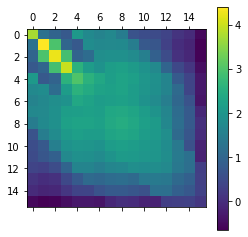

H (not log)


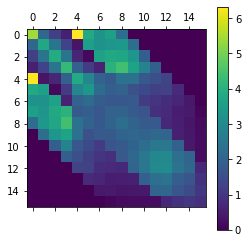

W


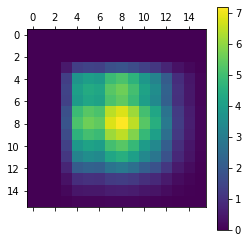

S


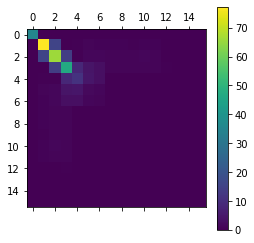

O


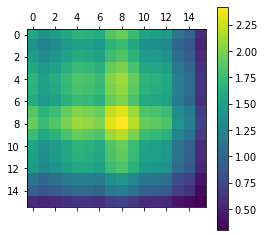

In [26]:
print('tot (as log)')
plt.matshow(np.log(C2))
plt.colorbar()
plt.show()
plt.close()

strs = ['H (not log)','W','S','O']
for [ii,CC] in enumerate( [CH,CW,CS,CO] ):
    print(strs[ii])
    plt.matshow(CC)
    plt.colorbar()
    plt.show()
    plt.close()

In [29]:
numCohorts = 16  ## this is 'M'
numCohPopData = 19  
resident_data_2018_raw = pd.read_csv('EWAgeDistributed.csv')
#resident_data_2018_raw  ## uncomment to show the data

## number in each cohort
Ni=np.zeros(numCohorts)
for i in range(numCohorts):
    Ni[i]=resident_data_2018_raw['Num'][i]
    
## put all the elderly in the last cohort
for i in range(numCohorts, numCohPopData):
    Ni[-1] += resident_data_2018_raw['Num'][i]
    
N = np.sum(Ni)
fi = Ni/N 

np.set_printoptions(precision=3)
print('** N =',int(N),'\n** fi:\n',fi)

** N = 59115809 
** fi:
 [0.059 0.063 0.058 0.055 0.063 0.068 0.067 0.066 0.06  0.068 0.07  0.064
 0.055 0.051 0.049 0.083]


In [30]:
## pick some cohorts to look at, range dispL:dispR
dispL = 2  
dispR = 6
print('selected block of C, cohorts',dispL,'to',dispR,':\n',C[dispL:dispR,dispL:dispR])
print('corresponding elements of fi:\n',fi[dispL:dispR])
print('**\n** clearly C is not going to become symmetric if I multiply rows (or cols) by elements of fi....')

selected block of C, cohorts 2 to 6 :
 [[4.541 0.818 0.142 0.276]
 [2.279 7.873 1.324 0.633]
 [0.27  2.024 2.425 1.295]
 [0.143 0.758 1.731 2.405]]
corresponding elements of fi:
 [0.058 0.055 0.063 0.068]
**
** clearly C is not going to become symmetric if I multiply rows (or cols) by elements of fi....


In [32]:
## pick some cohorts to look at, range dispL:dispR for C2
dispL = 2  
dispR = 6
print('selected block of C, cohorts',dispL,'to',dispR,':\n',C2[dispL:dispR,dispL:dispR])
print('corresponding elements of fi:\n',fi[dispL:dispR]) 

selected block of C, cohorts 2 to 6 :
 [[71.132 17.993  2.625  3.119]
 [17.993 53.408 13.56   8.645]
 [ 2.625 13.56  20.596 13.452]
 [ 3.119  8.645 13.452 11.502]]
corresponding elements of fi:
 [0.058 0.055 0.063 0.068]


In [33]:
symmC = np.copy(C).T  ## copy C and take transpose.  
symmC *= fi           ## multiply columns of C^T
symmC = symmC.T       ## transpose.  should have multiplied rows of symmC by fi
print('selected block of symmC, cohorts',dispL,'to',dispR,':\n',symmC[dispL:dispR,dispL:dispR])
print('** clearly very far from symmetric')

selected block of symmC, cohorts 2 to 6 :
 [[0.265 0.048 0.008 0.016]
 [0.126 0.436 0.073 0.035]
 [0.017 0.127 0.152 0.081]
 [0.01  0.052 0.118 0.164]]
** clearly very far from symmetric


In [34]:
symmC = np.copy(C2).T  ## copy C and take transpose.  
symmC *= fi           ## multiply columns of C^T
symmC = symmC.T       ## transpose.  should have multiplied rows of symmC by fi
print('selected block of symmC, cohorts',dispL,'to',dispR,':\n',symmC[dispL:dispR,dispL:dispR])
print('** clearly very far from symmetric')

selected block of symmC, cohorts 2 to 6 :
 [[4.152 1.05  0.153 0.182]
 [0.996 2.955 0.75  0.478]
 [0.165 0.853 1.295 0.846]
 [0.212 0.588 0.915 0.783]]
** clearly very far from symmetric


In [35]:
print(fi[dispR-1]*C[dispR-1,dispL])  ## this should be bottom-left element of block above
print(fi[dispL]*C[dispR-1,dispL])    ## this is what we would have got if we multiplied "the wrong way"

0.009706423492808957
0.008327321343102177


In [37]:
print(fi[dispR-1]*C2[dispR-1,dispL])  ## this should be bottom-left element of block above
print(fi[dispL]*C2[dispR-1,dispL])    ## this is what we would have got if we multiplied "the wrong way"

0.21219551023021943
0.18204647701181248


In [38]:
## total contacts per day
for jj in range(numCohorts):
    print('coh',jj,'tot contact',np.sum(CH0[:,jj]) )

coh 0 tot contact 2.88202235108567
coh 1 tot contact 4.570980596113428
coh 2 tot contact 5.014540916606705
coh 3 tot contact 4.3992268834826
coh 4 tot contact 2.4174694993059926
coh 5 tot contact 1.9082946129209484
coh 6 tot contact 2.5551881253945403
coh 7 tot contact 3.2100436454664547
coh 8 tot contact 2.9854549803841604
coh 9 tot contact 1.7804642046018513
coh 10 tot contact 1.2404919782050314
coh 11 tot contact 1.0421073726858283
coh 12 tot contact 0.868248251047667
coh 13 tot contact 0.7769218396036686
coh 14 tot contact 0.3556320895602522
coh 15 tot contact 0.373381857850466


In [39]:
## total contacts per day
for jj in range(numCohorts):
    print('coh',jj,'tot contact',np.sum(CH[:,jj]) )

coh 0 tot contact 28.5109042
coh 1 tot contact 25.71424792
coh 2 tot contact 27.2019418
coh 3 tot contact 29.07023712
coh 4 tot contact 29.14526936
coh 5 tot contact 27.19813572
coh 6 tot contact 26.090531679999998
coh 7 tot contact 30.331436213333333
coh 8 tot contact 31.56536961333333
coh 9 tot contact 28.333557560000003
coh 10 tot contact 24.36051816
coh 11 tot contact 23.399253453333337
coh 12 tot contact 20.688191240000002
coh 13 tot contact 14.202031359999998
coh 14 tot contact 10.45060208
coh 15 tot contact 4.43263232


** elderly contacts, last column of C


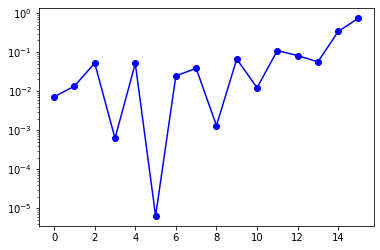

** elderly contacts, last row of C


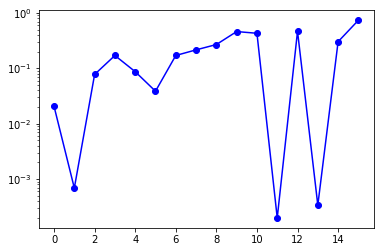

In [40]:
print('** elderly contacts, last column of C')
plt.semilogy(C[:,-1],'bo-')
plt.show()
plt.close()

print('** elderly contacts, last row of C')
plt.semilogy(C[-1,:],'bo-')
plt.show()
plt.close()

** elderly contacts, last column of C


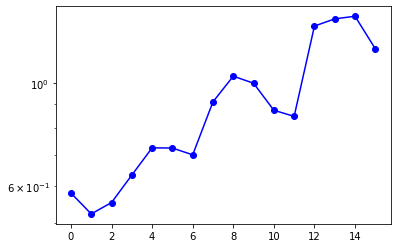

** elderly contacts, last row of C


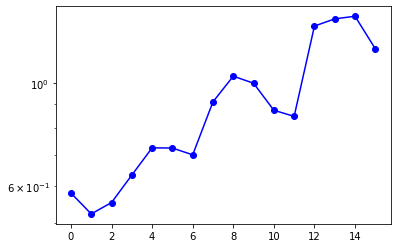

In [41]:
print('** elderly contacts, last column of C')
plt.semilogy(C2[:,-1],'bo-')
plt.show()
plt.close()

print('** elderly contacts, last row of C')
plt.semilogy(C2[-1,:],'bo-')
plt.show()
plt.close()